In [10]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [44]:
x_s = np.linspace(0, 5, num=200)
y_s = np.array([pipeline_v100.simulation(n=5, a_x= 1, h_z= x, DEBUG=True) for x in x_s])

trace of rho: (0.9999999999999998+0j)
trace of rho + delta: (0.9999999999999998-4.061254169242772e-19j)
purity of rho: (0.5865890947840968+0j)
purity of rho + delta: (0.5865292604440278+1.7734752333136913e-19j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (1-4.279074650612714e-19j)
trace of rho + delta: (1.0000000000000002+7.881648551136747e-19j)
purity of rho: (0.5862118027527495-6.268043809681823e-20j)
purity of rho + delta: (0.5858526891108695+1.4907779871675686e-19j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (0.9999999999999999-6.757341023164875e-21j)
trace of rho + delta: (1.0000000000000004+1.1237169503129555e-18j)
purity of rho: (0.585086195177753+1.0842021724855044e-18j)
purity of rho + delta: (0.5844337703165082-7.724940478959219e-19j)
rank of rho: 2
rank of rho + delta: 2
trace of rho: (0.9999999999999997-1.5720322245010583e-18j)
trace of rho + delta: (1+2.113855525647422e-18j)
purity of rho: (0.5832309836868059-6.326277324805556e-19j)
purity of rho + delta: 

In [45]:
y_s[0]

{'trace_rho': (0.9999999999999998+0j),
 'trace_rho_delta': (0.9999999999999998-4.061254169242772e-19j),
 'purity_rho': (0.5865890947840968+0j),
 'purity_rho_delta': (0.5865292604440278+1.7734752333136913e-19j),
 'rank_rho': 2,
 'rank_rho_delta': 2,
 'lower_tqfi': (39901.51596246756-5.890290149145003e-07j),
 'upper_tqfi': 39901.51660655836}

In [ ]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])

error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

9.218847218989658e-05


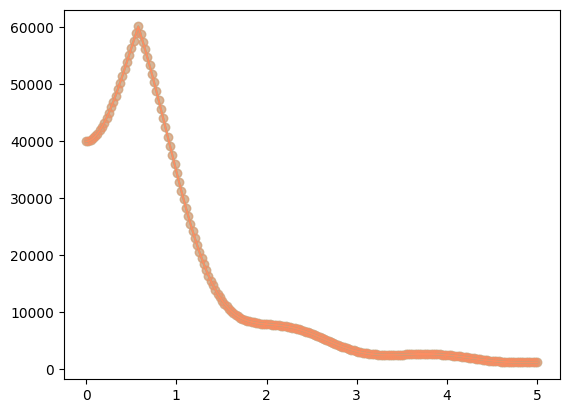

In [59]:
plt.scatter(x_s, lower_tqfi, alpha=0.5)
plt.plot(x_s, lower_tqfi)
plt.scatter(x_s, (upper_tqfi), alpha=0.5)
plt.plot(x_s, (upper_tqfi))

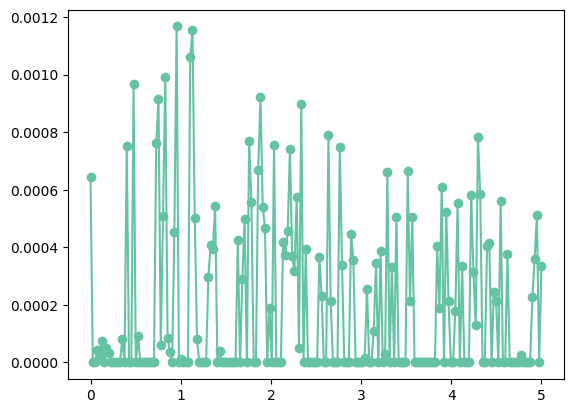

In [60]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)

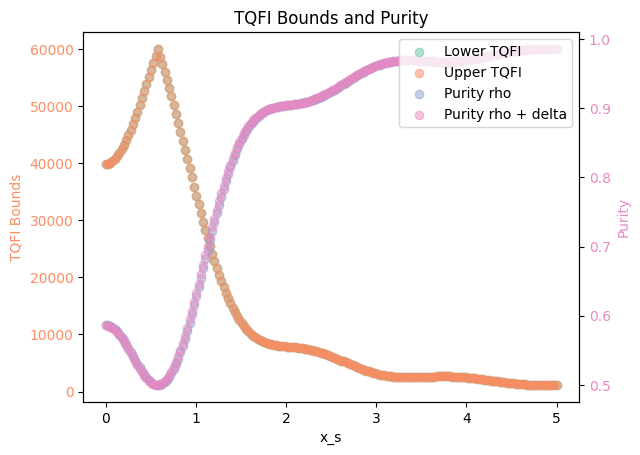

In [85]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, label="Lower TQFI", color = palette[0])
#ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, alpha=0.5, label="Upper TQFI", color =  palette[1])
#ax1.plot(x_s, upper_tqfi)

ax1.set_xlabel("x_s")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.5, label="Purity rho", 
            color= palette[2])
ax2.scatter(x_s, purity_rho_delta, alpha=0.5, label="Purity rho + delta", color = palette[3])

ax2.set_ylabel("Purity", color=palette[3])
ax2.tick_params(axis='y', labelcolor=palette[3])

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()
